In [1]:
___Author___='LumberJack Jyss'

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

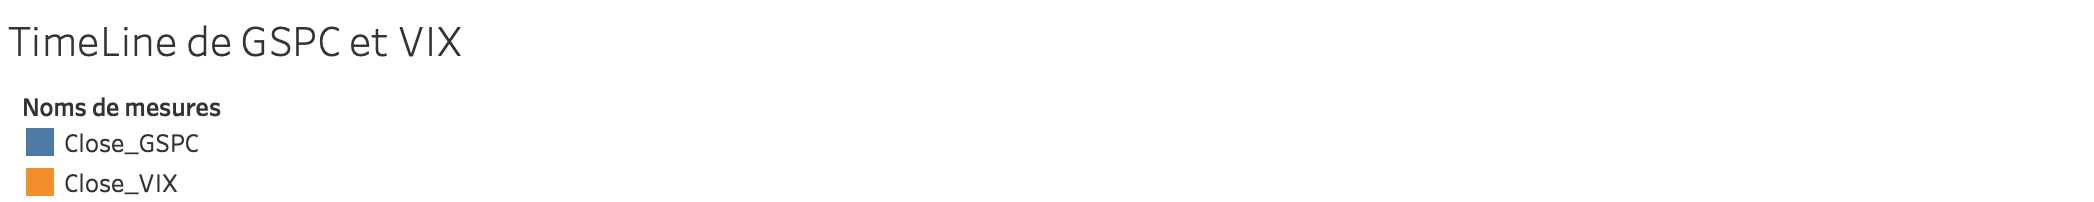

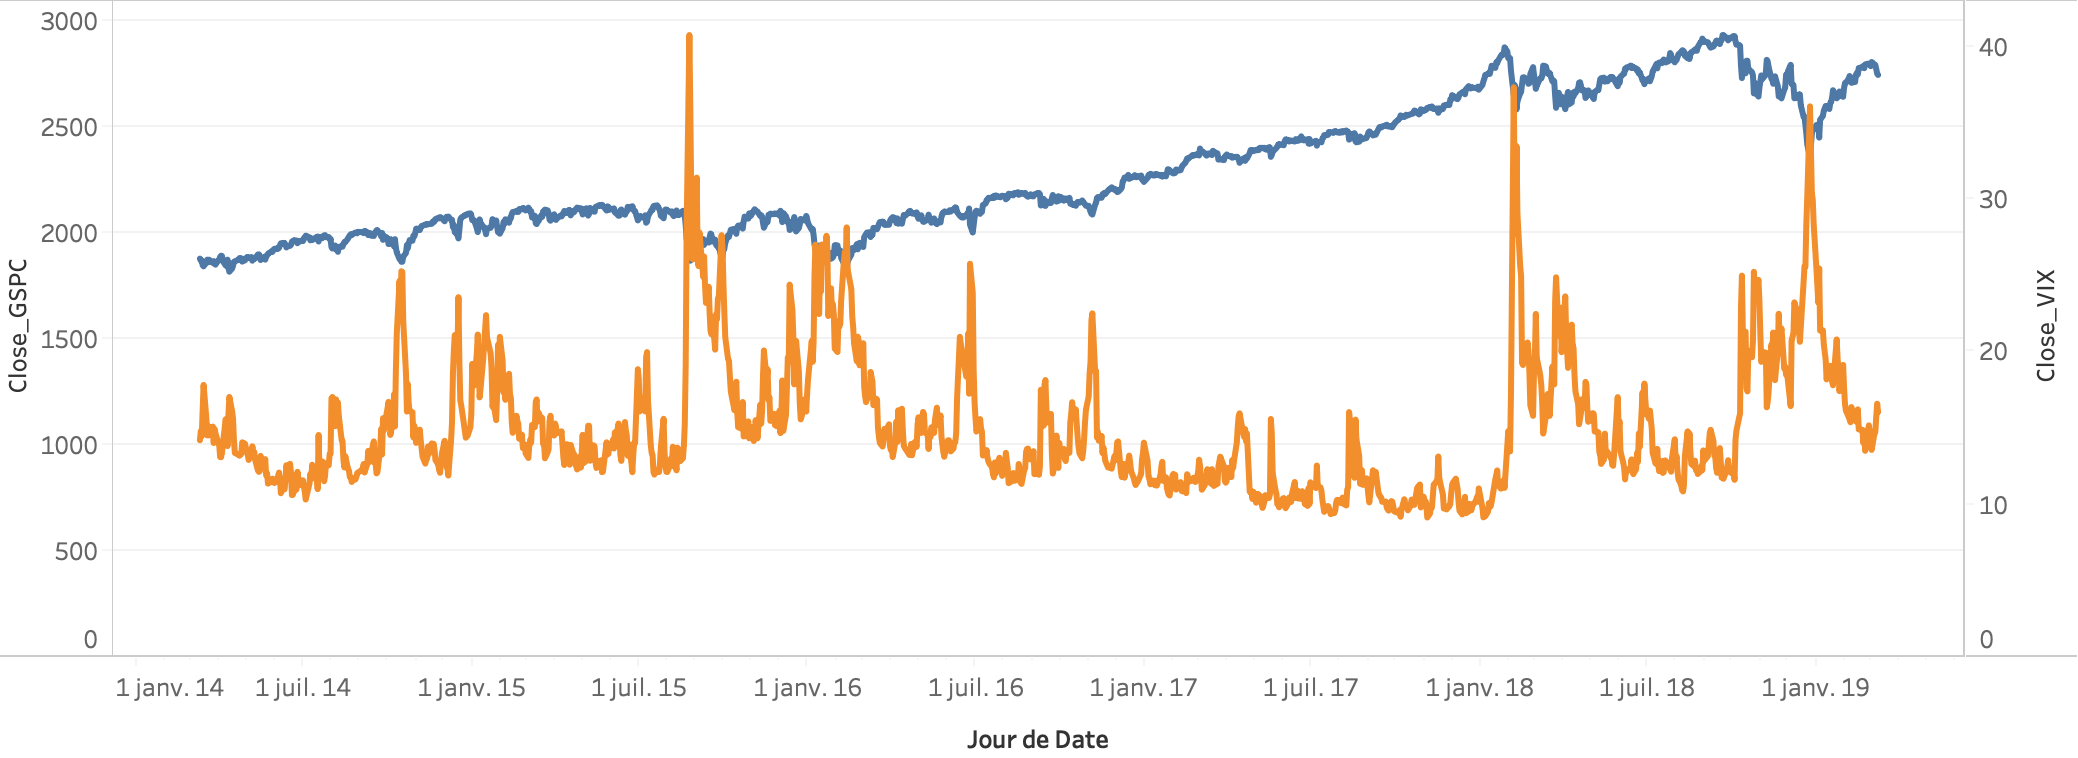

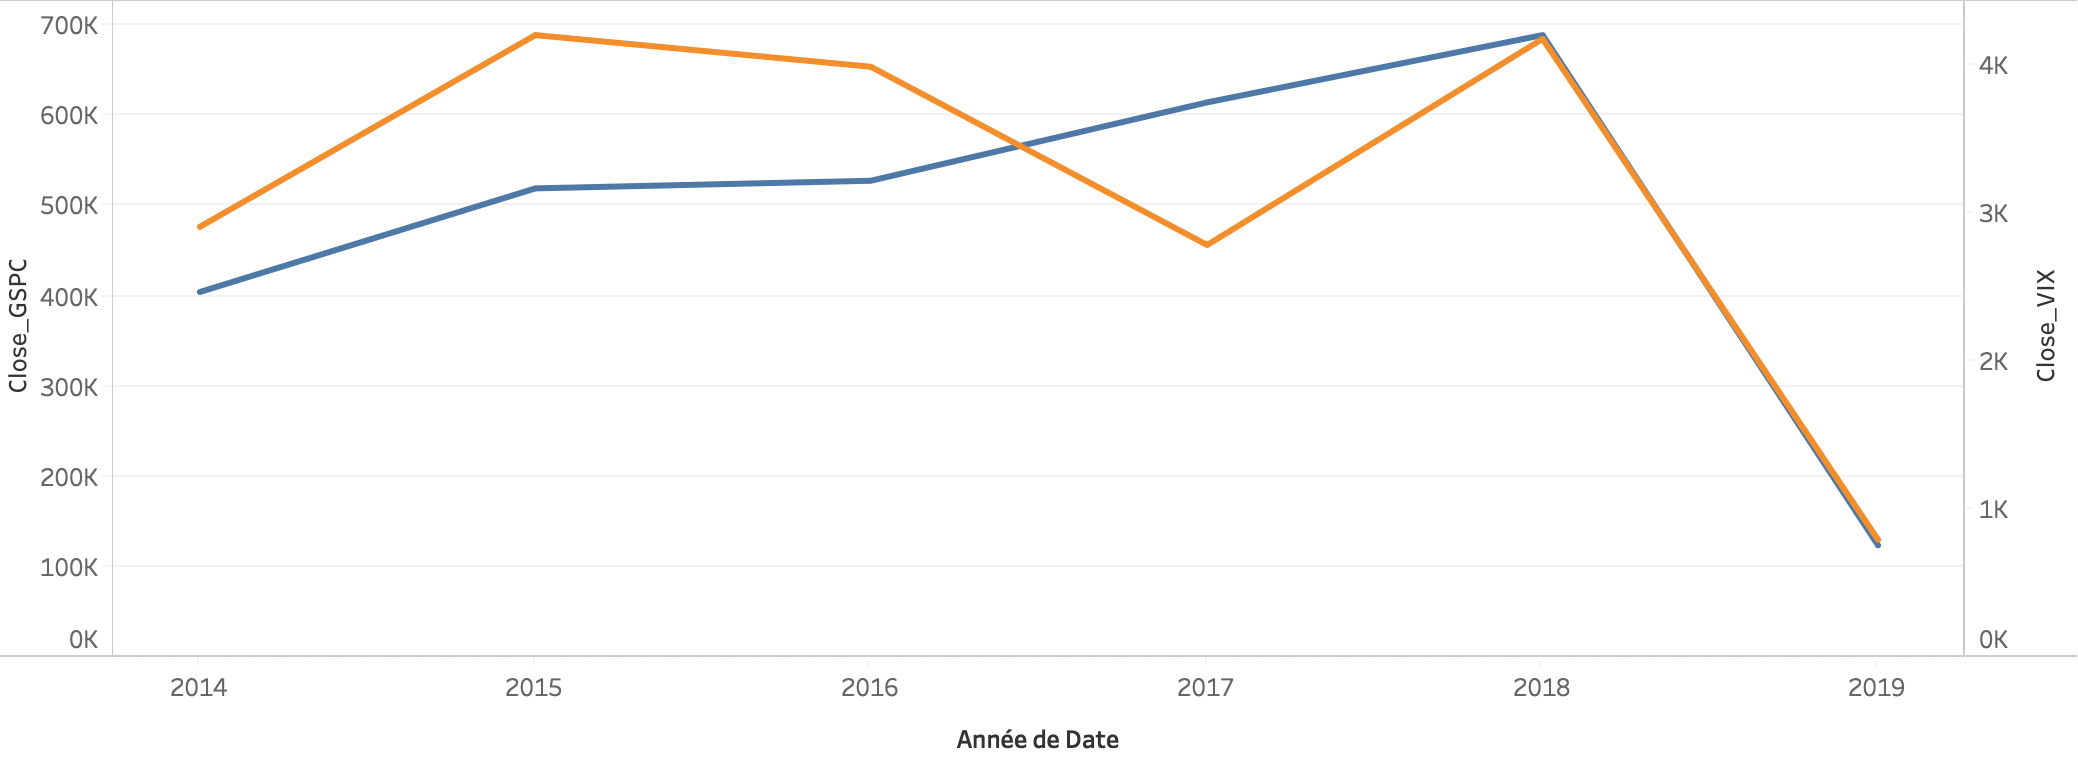

In [32]:
raw_data=pd.read_csv('data.csv')
df=raw_data.copy()
df=df.drop(['Volume_GSPC'],axis=1)
df.head()

,Date,Close_GSPC,Close_VIX
0,2014-03-10,1877.170044,14.200000
1,2014-03-11,1867.630005,14.800000
2,2014-03-12,1868.199951,14.470000
3,2014-03-13,1846.339966,16.219999
4,2014-03-14,1841.130005,17.820000


In [44]:
df.describe()

,Close_GSPC,Close_VIX
count,1259.000000,1259.000000
mean,2287.189388,14.971088
std,311.713817,4.296993
min,1815.689941,9.140000
25%,2044.485046,12.080000
50%,2161.199951,13.820000
75%,2582.219971,16.619999
max,2930.750000,40.740002


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 3 columns):
Date          1259 non-null object
Close_GSPC    1259 non-null float64
Close_VIX     1259 non-null float64
dtypes: float64(2), object(1)
memory usage: 29.6+ KB


### Definition des variables

In [50]:
y=df['Close_GSPC']
X=df['Close_VIX']

### OLS
#### Standardisation des variables. En Max-Min

In [60]:
#scale = StandardScaler()
#X_scaled = scale.fit_transform(X)
X.values.reshape(-1, 1)
#X

array([[14.2     ],
       [14.8     ],
       [14.47    ],
       ...,
       [15.74    ],
       [16.59    ],
       [16.049999]])

#### Estimation

In [61]:
est = sm.OLS(y, X).fit()

In [62]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Close_GSPC   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 1.081e+04
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:26:14   Log-Likelihood:                -10113.
No. Observations:                1259   AIC:                         2.023e+04
Df Residuals:                    1258   BIC:                         2.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close_VIX    140.2712      1.349    103.990      0.000     137.625     142.918
==============================================================================
Omnibus:                      196.094   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.322
Skew:                          -0.967   Prob(JB):                     1.89e-77
Kurtosis:                       4.731   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot

In [68]:
x=sm.add_constant(X)

In [71]:
x.head()

,const,Close_VIX
0,1.0,14.200000
1,1.0,14.800000
2,1.0,14.470000
3,1.0,16.219999
4,1.0,17.820000
